In [1]:
import sys
import os
# Dynamically get the path of the current directory
current_dir = os.getcwd()

# Assuming the package is one level up
local_package_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add this path to sys.path
sys.path.insert(0, local_package_dir)

# Now you can import your local package
from util import validate
from truthnet import load_veritas_model

from truthnet import train

In [2]:
train(datapath='../../data/ptsd.csv',target_label='PTSDDx',query_limit=20,
      modelpath='../../veritas_models/veritas_012.pkl.gz')

  0%|          | 0/10 [00:00<?, ?it/s]

100%|█████████████████████████████████████| 5000/5000 [1:02:02<00:00,  1.34it/s]


In [3]:
# check
M=load_veritas_model('../../veritas_models/veritas_012.pkl.gz')
M#.keys()

{'version': '0.0.1',
 'model': qnet.Qnet,
 'model_neg': qnet.Qnet,
 'problem': '',
 'shapvalues': array([[ 0.00732443,  0.        ,  0.00385222, ...,  0.01310767,
          0.00962815,  0.00401081],
        [ 0.        ,  0.        ,  0.00117954, ...,  0.        ,
         -0.00716721,  0.00434843],
        [ 0.01533202, -0.00240123,  0.        , ...,  0.        ,
         -0.0011775 ,  0.        ],
        ...,
        [ 0.01034278,  0.        ,  0.        , ...,  0.01504641,
          0.00946302,  0.00375033],
        [ 0.00528653, -0.00379034,  0.        , ...,  0.00582404,
          0.        ,  0.00268687],
        [ 0.01298692,  0.        ,  0.        , ...,  0.00691518,
          0.        , -0.00090719]]),
 'calibration_lower': array([1.04158836, 1.04158836, 1.04158836, ..., 1.16495605, 1.02488754,
        1.0828592 ]),
 'calibration_veritas': array([0.60840999, 0.60840999, 0.60840999, ..., 0.64404223, 0.62430939,
        0.62924668]),
 'dist_lower': <scipy.stats._distn_infrast

In [5]:
shp=M['shapvalues']

<AxesSubplot:>

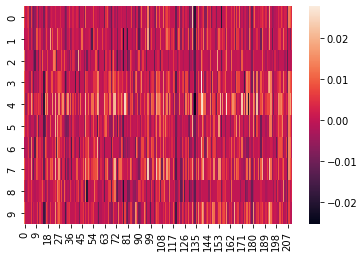

In [69]:
import seaborn as sns
sns.heatmap(shp)

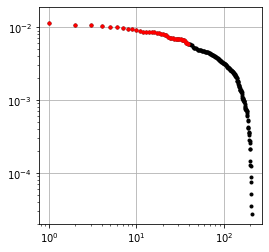

In [74]:
import pandas as pd
import pylab as plt
plt.figure(figsize=[4,4])
a=pd.DataFrame(shp).mean().abs()
b=pd.DataFrame(shp).mean()
df=pd.DataFrame(a.values,b.values).reset_index()
df.columns=['shp','shpabs']
df=df.sort_values('shpabs',ascending=False)
df.reset_index().shpabs.plot(style='k.',logy=True,logx=True)
df.reset_index().head(40).shpabs.plot(style='r.',logy=True,logx=True)
df.index.name='shpindex'
df.reset_index().to_csv('../tex/Figures/plotdata/shpval.csv',index=None)
plt.grid()

In [72]:
df

,shp,shpabs
134,-0.014035,0.014035
193,0.011369,0.011369
139,0.010861,0.010861
24,0.010661,0.010661
15,-0.010541,0.010541
...,...,...
6,-0.000051,0.000051
108,0.000035,0.000035
150,0.000027,0.000027
62,0.000000,0.000000


In [55]:
df.shpabs[0]

0.008544625501882749

In [56]:
df.shpabs

134    0.014035
193    0.011369
139    0.010861
24     0.010661
15     0.010541
         ...   
6      0.000051
108    0.000035
150    0.000027
62     0.000000
189    0.000000
Name: shpabs, Length: 211, dtype: float64